<a href="https://colab.research.google.com/github/ffelicioni/tp_infoviz/blob/main/EDA_Vast_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - city of Engagement, Ohio USA

## Modulos

In [8]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
from shapely import wkt
import seaborn as sns
from pandas.plotting import parallel_coordinates

from scipy.stats import chi2_contingency
from tabulate import tabulate

### Funciones

In [73]:
def tabla_contigencia(df,X,Y): 
  contigency= pd.crosstab(df[X], df[Y])
  print(tabulate(contigency, headers='keys', tablefmt='psql'))
  contigency_pct = pd.crosstab(df[X], df[Y], normalize='all')
  print(tabulate(contigency_pct, headers='keys', tablefmt='psql'))
  c, p, dof, expected = chi2_contingency(contigency)
  print('pvalor',p, 'X-squared', c)
  texto='rechaza hipótesis nula que sostiene independencia entre variables '+X+' y '+Y
  print('SI '+ texto if p <0.1 else 'NO '+texto)

## Datasets

En los dataset que tengo "location" renombro dicha columna como "geometry" y le agrego una columna que se llame "type" con la descripción del tipo de edificio para luego preparar dataset para graficar el mapa. 

In [10]:
path='https://raw.githubusercontent.com/ffelicioni/tp_infoviz/main/data'

In [11]:
participants=pd.read_csv(path+"/Attributes/Participants.csv")
participants

,participantId,householdSize,haveKids,age,educationLevel,interestGroup,joviality
0,0,3,True,36,HighSchoolOrCollege,H,0.001627
1,1,3,True,25,HighSchoolOrCollege,B,0.328087
2,2,3,True,35,HighSchoolOrCollege,A,0.393470
3,3,3,True,21,HighSchoolOrCollege,I,0.138063
4,4,3,True,43,Bachelors,H,0.857397
...,...,...,...,...,...,...,...
1006,1006,1,False,19,HighSchoolOrCollege,J,0.639268
1007,1007,1,False,40,HighSchoolOrCollege,B,0.934348
1008,1008,1,False,23,Graduate,C,0.163721
1009,1009,1,False,39,Low,B,0.828330


In [12]:
schools=pd.read_csv(path+"/Attributes/Schools.csv")
schools.rename(columns={"location": "geometry"},inplace=True)
schools['geometry'] = schools['geometry'].apply(wkt.loads)
schools['type']='school'
schools

,schoolId,monthlyCost,maxEnrollment,geometry,buildingId,type
0,0,12.812445,242,POINT (-376.7505037068263 1607.9843212558562),662,school
1,450,91.143514,418,POINT (-2597.447677094323 3194.1547530883445),943,school
2,900,38.005380,394,POINT (-2539.1584040534744 6556.0323181733565),262,school
3,1350,73.197852,384,POINT (-4701.462928834322 5141.762936081409),123,school


In [13]:
restaurants=pd.read_csv(path+"/Attributes/Restaurants.csv")
restaurants.rename(columns={"location": "geometry"},inplace=True)
restaurants['geometry'] = restaurants['geometry'].apply(wkt.loads)
restaurants['type']='restaurants'
restaurants

,restaurantId,foodCost,maxOccupancy,geometry,buildingId,type
0,445,5.15,71,POINT (631.5130723031391 2001.4772026036535),304,restaurants
1,446,4.17,82,POINT (413.840000705876 1194.128694228948),308,restaurants
2,447,5.87,119,POINT (497.9967937001494 1624.515148185587),58,restaurants
3,448,4.07,98,POINT (698.2411158717262 4392.416668183332),964,restaurants
4,449,5.11,53,POINT (1407.7107695149243 4010.4574815269225),181,restaurants
5,895,4.44,103,POINT (-1623.0740591441258 3872.0300113645017),164,restaurants
6,896,5.86,107,POINT (-2126.1723943111892 4285.182228265561),619,restaurants
7,897,5.76,104,POINT (-1989.63526350385 3368.764837974986),875,restaurants
8,898,4.22,115,POINT (-1771.452216635636 4343.580176583138),917,restaurants
9,899,5.65,85,POINT (-820.9290279479601 4497.243308530136),86,restaurants


In [14]:
pubs=pd.read_csv(path+"/Attributes/Pubs.csv")
pubs.rename(columns={"location": "geometry"},inplace=True)
pubs['geometry'] = pubs['geometry'].apply(wkt.loads)
pubs['type']='pubs'
pubs

,pubId,hourlyCost,maxOccupancy,geometry,buildingId,type
0,442,8.281103,64,POINT (964.4380231713202 3991.603473784208),556,pubs
1,443,6.417435,64,POINT (1809.880173357865 4339.172426035451),29,pubs
2,444,12.581806,84,POINT (770.4279044387976 932.5852003214752),1012,pubs
3,892,11.642905,96,POINT (-1524.9573211662105 3815.271490114369),502,pubs
4,893,14.840473,79,POINT (-1608.766411449925 3886.4924784954583),164,pubs
5,894,12.311210,72,POINT (-1702.5378155541193 3865.477090848479),238,pubs
6,1342,14.140037,77,POINT (-260.45747053139064 5026.150804179361),429,pubs
7,1343,10.524972,67,POINT (-501.42676062779447 3551.572638649489),489,pubs
8,1344,10.415293,60,POINT (-225.9209866450221 3878.053697626113),585,pubs
9,1798,11.545351,64,POINT (-3209.738139187618 6487.657688065099),953,pubs


Entre los buildings hay tres tipos de edificios, commercial, residential y school

In [15]:
buildings=pd.read_csv(path+"/Attributes/Buildings.csv")
buildings.rename(columns={"location": "geometry"},inplace=True)
buildings['geometry'] = buildings['geometry'].apply(wkt.loads)
buildings['type']=buildings['buildingType'].str.lower()
print(buildings.buildingType.unique())

print(buildings.describe())

['Commercial' 'Residental' 'School']
        buildingId  maxOccupancy
count  1042.000000    503.000000
mean    521.500000     15.506958
std     300.943793     37.030291
min       1.000000      1.000000
25%     261.250000      5.000000
50%     521.500000      7.000000
75%     781.750000     12.000000
max    1042.000000    418.000000


In [16]:
apartments=pd.read_csv(path+"/Attributes/Apartments.csv")
apartments.rename(columns={"location": "geometry"},inplace=True)
apartments['geometry'] = apartments['geometry'].apply(wkt.loads)
apartments['type']='apartments'
apartments.describe()

,apartmentId,rentalCost,maxOccupancy,numberOfRooms,buildingId
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,867.355966,814.495168,2.508899,2.487805,543.369150
std,516.527633,278.784568,1.112750,1.108561,305.765594
min,1.000000,348.400000,1.000000,1.000000,2.000000
25%,452.000000,602.340000,2.000000,1.000000,286.000000
50%,903.000000,804.370000,3.000000,3.000000,551.000000
75%,1354.000000,997.940000,3.000000,3.000000,824.000000
max,1733.000000,1601.110000,4.000000,4.000000,1040.000000


In [17]:
employers=pd.read_csv(path+"/Attributes/Employers.csv")
employers.rename(columns={"location": "geometry"},inplace=True)
employers['geometry'] = employers['geometry'].apply(wkt.loads)
employers['type']='employers'
employers.describe()

,employerId,buildingId
count,253.000000,253.000000
mean,1089.059289,517.778656
std,507.094228,303.345131
min,379.000000,3.000000
25%,829.000000,261.000000
50%,1279.000000,486.000000
75%,1734.000000,782.000000
max,1797.000000,1041.000000


In [18]:
jobs=pd.read_csv(path+"/Attributes/Jobs.csv")
jobs.rename(columns={"location": "geometry"},inplace=True)
jobs.describe()

,jobId,employerId,hourlyRate
count,1328.000000,1328.000000,1328.000000
mean,663.500000,1058.746988,19.133254
std,383.504889,506.383844,12.199933
min,0.000000,379.000000,10.000000
25%,331.750000,438.000000,10.028742
50%,663.500000,884.000000,14.743775
75%,995.250000,1337.000000,23.317398
max,1327.000000,1797.000000,100.000000


## Análisis de participantes

In [19]:
participants

,participantId,householdSize,haveKids,age,educationLevel,interestGroup,joviality
0,0,3,True,36,HighSchoolOrCollege,H,0.001627
1,1,3,True,25,HighSchoolOrCollege,B,0.328087
2,2,3,True,35,HighSchoolOrCollege,A,0.393470
3,3,3,True,21,HighSchoolOrCollege,I,0.138063
4,4,3,True,43,Bachelors,H,0.857397
...,...,...,...,...,...,...,...
1006,1006,1,False,19,HighSchoolOrCollege,J,0.639268
1007,1007,1,False,40,HighSchoolOrCollege,B,0.934348
1008,1008,1,False,23,Graduate,C,0.163721
1009,1009,1,False,39,Low,B,0.828330


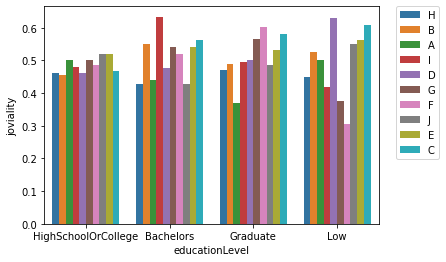

In [20]:
g = sns.barplot(data=participants, x='educationLevel', y='joviality',hue='interestGroup', ci=None)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

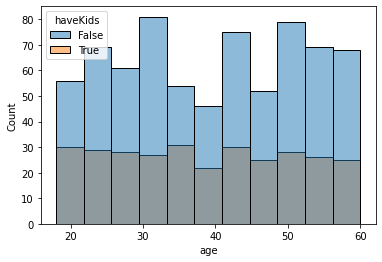

In [21]:
g2=sns.histplot(data=participants, x='age',hue='haveKids')

In [35]:
participants.educationLevel.value_counts()

HighSchoolOrCollege    525
Bachelors              232
Graduate               170
Low                     84
Name: educationLevel, dtype: int64

In [77]:
# escala educativa
scale_mapper = {"Low":1, "HighSchoolOrCollege":2, "Bachelors":3,"Graduate":4}
participants["educationScale"] = participants.educationLevel.replace(scale_mapper)

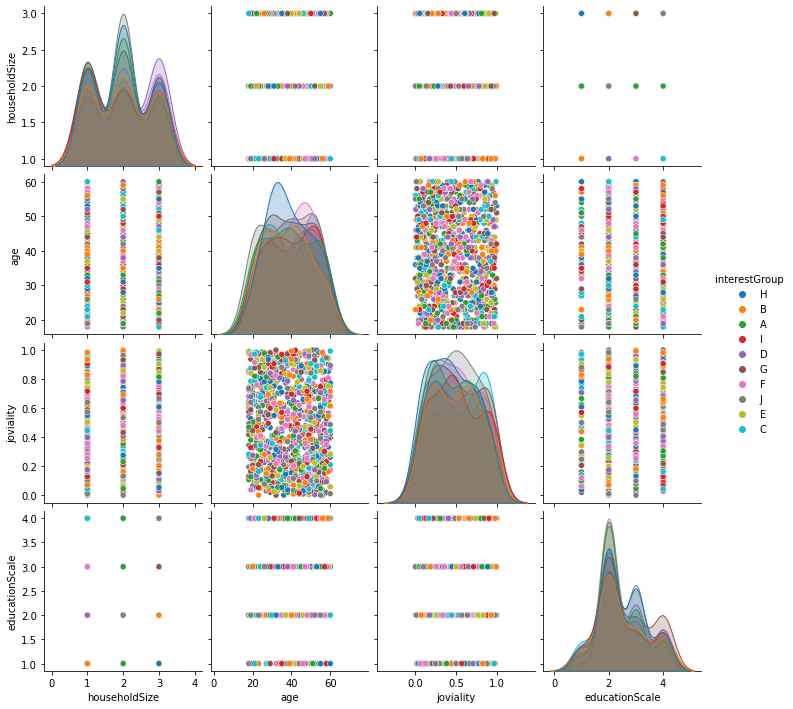

In [67]:
sns.pairplot(participants,vars = ['householdSize', 'age', 'joviality','educationScale'],hue = 'interestGroup')

In [72]:
X='educationLevel'
Y='interestGroup'
tabla_contigencia(participants,X,Y)

+---------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| educationLevel      |   A |   B |   C |   D |   E |   F |   G |   H |   I |   J |
|---------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----|
| Bachelors           |  24 |  19 |  21 |  27 |  12 |  20 |  24 |  34 |  17 |  34 |
| Graduate            |  12 |  17 |  15 |  17 |  18 |  17 |  26 |  16 |  17 |  15 |
| HighSchoolOrCollege |  59 |  45 |  54 |  49 |  47 |  63 |  47 |  51 |  52 |  58 |
| Low                 |   7 |  10 |  12 |   3 |   6 |   6 |  11 |  10 |  10 |   9 |
+---------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+---------------------+------------+-----------+-----------+------------+------------+------------+-----------+-----------+-----------+------------+
| educationLevel      |          A |         B |         C |          D |          E |          F |         G |         H |         I |          J |
|---------------------+-------

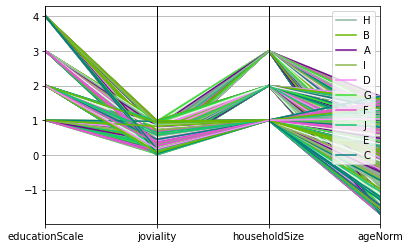

In [76]:
# normalizar edad
participants["ageNorm"] = (participants.age-participants.age.mean())/participants.age.std()

parallel_coordinates(participants,cols=['educationScale', 'joviality','householdSize','ageNorm'], class_column='interestGroup')

## Genero mapa

Concateno las columnas de geometria, buildingID y type. Escuelas, restaurants y pubs tienen geometría "POINT" mientras que los buildings tiene "POLYGON"

In [22]:
#solo concateno escuelas, restaurantes, pubs, buildings
df=pd.concat([schools[['geometry','buildingId','type']]
              ,restaurants[['geometry','buildingId','type']]
              ,pubs[['geometry','buildingId','type']]
              ,buildings[['geometry','buildingId','type']]
              ,employers[['geometry','buildingId','type']]
             ])
df

,geometry,buildingId,type
0,POINT (-376.7505037068263 1607.9843212558562),662,school
1,POINT (-2597.447677094323 3194.1547530883445),943,school
2,POINT (-2539.1584040534744 6556.0323181733565),262,school
3,POINT (-4701.462928834322 5141.762936081409),123,school
0,POINT (631.5130723031391 2001.4772026036535),304,restaurants
...,...,...,...
248,POINT (-3313.211912858075 6185.8337275541235),738,employers
249,POINT (-3786.373075235378 4999.485452069126),802,employers
250,POINT (-3267.606054814424 6452.56705940432),953,employers
251,POINT (-3725.261225376805 6345.551342169127),1011,employers


In [23]:
crs={'init':'epsg:3395'}
#Ohio UTC -4
geo_df=gpd.GeoDataFrame(df,crs=crs)
#geo_df.to_crs('EPSG:3395')

geo_df

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,geometry,buildingId,type
0,POINT (-376.751 1607.984),662,school
1,POINT (-2597.448 3194.155),943,school
2,POINT (-2539.158 6556.032),262,school
3,POINT (-4701.463 5141.763),123,school
0,POINT (631.513 2001.477),304,restaurants
...,...,...,...
248,POINT (-3313.212 6185.834),738,employers
249,POINT (-3786.373 4999.485),802,employers
250,POINT (-3267.606 6452.567),953,employers
251,POINT (-3725.261 6345.551),1011,employers


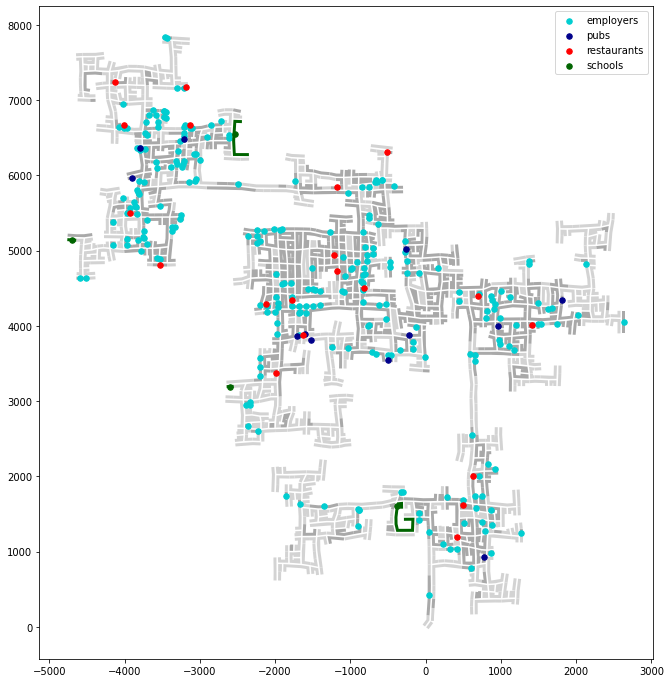

In [24]:
world = gpd.read_file(gpd.geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='white', figsize=(12, 12))
#cities.plot(ax=ax, marker='o', color='blue', markersize=5);
geo_df[geo_df['type']=='residental'].plot(ax=ax, markersize=5,color='lightgray',label="residental")
geo_df[geo_df['type']=='commercial'].plot(ax=ax, markersize=5,color='darkgray',label="commercial")
geo_df[geo_df['type']=='employers'].plot(ax=ax, markersize=30,color='darkturquoise',marker="o",label="employers")
geo_df[geo_df['type']=='pubs'].plot(ax=ax, markersize=30,color='darkblue',marker="o",label="pubs")
geo_df[geo_df['type']=='restaurants'].plot(ax=ax, markersize=30,color='red',marker="o",label="restaurants")
geo_df[geo_df['type']=='school'].plot(ax=ax, markersize=30,color='darkgreen',marker="o",label="schools")
ax.legend(prop={'size':10})

plt.show()

* gris claro, residenciales
* gris medio, comerciales